# 로지스틱 회귀(Logistic Regression)

* 선형 모델을 분류에 사용해 특정 클래스에 속할 확률을 추정하는 데 사용할 수 있다.
* 반응변수가 범주형인 경우 적용하는 회귀분석을 로지스틱 회귀분석이라 한다.
  * 예를 들면 누군가의 카드대금이 주어졌을 때 그 사람이 카드대금을 연체할 확률을 구하는 것이다.
    * $\mathrm{P}(연체=Yes|잔고)$

### $\mathrm{P}(X)$와 $X$ 사이의 모델링
* $\mathrm{P}(X)=\mathrm{P}(Y=1|X)$와 $X$ 사이의 관계를 모델링할 때, 새로운 접근이 필요하다.
* 즉, 모든 $X$의 값에 대하여 0에서 1 사이의 값을 제공하는 함수를 사용해야 한다.
* 따라서 $X$가 절댓값이 큰 음수일 때, 0이 되고 절댓값이 큰 양수일 때 1이 되는 시그모이드 함수(또는 로지스틱 함수)를 사용해야 한다.
  * $Y=\dfrac{1}{1+e^{-X}}$

### 승산비(Odds)
* Odds는 `실패에 비해 성공할 확률`을 의미한다.
  * 즉, $\dfrac{p}{1-p}$와 같이 계산한다. ($p=$성공할 확률)
* 하지만 $\mathrm{P}(Y=1|X)$의 값이 1에 가까워질수록 Odds는 무한대로 발산하므로 범위의 제약이 있다.
  * 그래서 로그함수를 이용하여 성공확률 0.5를 기준으로 $X$의 값이 나뉘게 만들 수 있다.
    * $\log(Odds)=\log\left(\dfrac{\mathrm{P}(X)}{1+\mathrm{P}(X)}{\right)=\beta_0+\beta_1X$
  * 위의 등식의 양변에 로그를 지우면 설명변수로 승산비를 표현할 수 있다.
    * $Odds=\dfrac {\mathrm{P}(X)}{1+\mathrm{P}(X)}=e^{\beta_0+\beta_1X}$
  * 위의 등식에서 성공확률 $\mathrm{P}(X)$를 설명변수에 대한 식으로 다음과 같이 표현할 수 있다.
    * $\mathrm{P}(X)=\dfrac{1}{1+ e^{-(\beta_0+\beta_1X)}}$
  * 이 과정을 통해 로지스틱 회귀 모델은 설명변수 $X$에 대해 선형적인 로짓을 가진다고 말할 수 있다.
    * 위의 카드대금 예시에서 승산비가 높으면 연체확률이 증가하고 승산비가 낮으면 연체확률이 낮아지는데,
        * 결론적으로 $X$에 속할수록 $Y$를 할 확률이 $e^{\beta_{1}}$배 증가한다.


(9375, 11) (4018, 11) (9375,) (4018,)


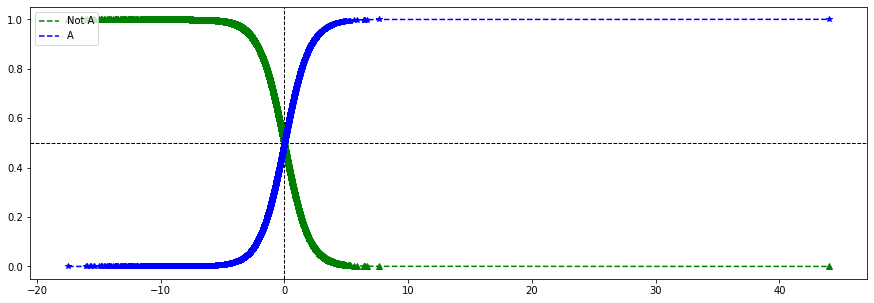

혼동행렬
 [[2763  251]
 [ 345  659]]

=====

정확도	85.17%
정밀도	72.42%
재현율	65.64%
F1	68.86%

=====



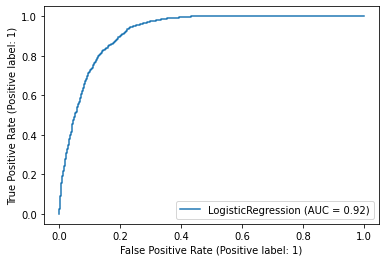

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv('./data/bodyPerformance.csv')
body.head()

# gender 변수 binary로 바꿔주기(남자 : 0, 여자 : 1)
body.replace('M', 0, inplace=True)
body.replace('F', 1, inplace=True)

# 이진분류를 할 것이므로 class에서 A인 경우 1, A가 아닌 경우 0으로 설정
body['class_1'] = np.where(body['class'] == 'A', 1, 0)
x=body.drop(columns = 'class', inplace=True)
body[['gender', 'class_1']].head()

# 설명변수와 종속변수 나누기
from sklearn.model_selection import train_test_split

y=body.pop('class_1')
x=body

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(x_train, y_train)

proba = pd.DataFrame(logR.predict_proba(x_train))
cs = logR.decision_function(x_train) # cs : Confidence Score

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df # Not A애 속할 확률, A에 속할 확률, cs

# Confidence Score에 따른 클래스 확률값을 매칭시키면 클래스 A에 속할 추정확률과 결정경계(파란선)를 얻을 수 있다.
plt.figure(figsize=(15, 5))
plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.legend(loc='upper left')
plt.show()

# 테스트데이터세트에 대해 분류 모델의 성능 평가하기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(x_test)

test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)

print('혼동행렬\n', test_cm)
print('\n=====\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))
print('\n=====\n')

# ROC 커브와 함께 AUC 시각화하기
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logR, x_test, y_test)
plt.show()


### 다중 클래스 분류 - 소프트맥스 회귀

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv('./data/bodyPerformance.csv')
body.head()

# gender 변수 binary로 바꿔주기(남자 : 0, 여자 : 1)
body.replace('M', 0, inplace=True)
body.replace('F', 1, inplace=True)

# 4개의 class를 각각 {A:0, B:1, C:2, D:3}이 되도록 전처리
body['class_2'] = body['class'].map({'A':0, 'B':1, 'C':2, 'D':3})
body.drop(columns='class', inplace=True)

y=body.pop('class_2')
x=body

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LogisticRegression

softm=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softm.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score

pred = softm.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print('혼동행렬\n',test_cm)
print('\n=====\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))

(9375, 11) (4018, 11) (9375,) (4018,)
혼동행렬
 [[707 261  36   0]
 [269 403 299  33]
 [ 92 207 525 181]
 [ 13  63 157 772]]

=====

정확도	59.91%
